In [1]:
import SimpleITK as sitk
import os, sys
sys.path.append('./workflow/libs/')
import utils
import pandas as pd

# Results Visualization 

Tool for interacting with results on exahead 

In [6]:
res = pd.read_csv('/home/exacloud/lustre1/NGSdev/evansna/cyclicIF/output/aggregated_results.csv')
res.head()

,Unnamed: 0,status,core,round,color_channel,path,Unnamed: 0_x,center_x,center_y,width,...,cluster,Unnamed: 0_y,name,jacaard_coef,dice_coef,volume_similarity,false_neg_err,false_pos_err,hausdorff_dist,registered_path
0,0,unregistered,56,R0,c1,unregistered_core=56_round=R0_color=c1.tif,55.0,314.0,338.0,95.0,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/home/exacloud/lustre1/NGSdev/evansna/cyclicIF...
1,1,unregistered,56,R1,c3,unregistered_core=56_round=R1_color=c3.tif,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/home/exacloud/lustre1/NGSdev/evansna/cyclicIF...
2,2,registered,56,R1,c1,registered_core=56_round=R1_color=c1.tif,221.0,311.0,363.0,88.0,...,56.0,0.0,registered_core=56_round=R1_color=c1.tif,0.631839,0.774389,-0.052407,0.245384,0.204773,0.177183,/home/exacloud/lustre1/NGSdev/evansna/cyclicIF...
3,3,registered,56,R2,c3,registered_core=56_round=R2_color=c3.tif,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/home/exacloud/lustre1/NGSdev/evansna/cyclicIF...
4,4,unregistered,56,R1,c5,unregistered_core=56_round=R1_color=c5.tif,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/home/exacloud/lustre1/NGSdev/evansna/cyclicIF...


In [8]:
res.columns

Index(['Unnamed: 0', 'status', 'core', 'round', 'color_channel', 'path',
       'Unnamed: 0_x', 'center_x', 'center_y', 'width', 'height',
       'Volume (nm^3)', 'Elongation', 'Flatness',
       'Oriented Bounding Box Minimum Size(nm)',
       'Oriented Bounding Box Maximum Size(nm)', 'Intensity Mean',
       'Intensity Standard Deviation', 'Intensity Skewness', 'component',
       'img_name', 'protein', 'slide_name', 'date', 'scan_id', 'scene', 'note',
       'file_type', 'original', 'cluster', 'Unnamed: 0_y', 'name',
       'jacaard_coef', 'dice_coef', 'volume_similarity', 'false_neg_err',
       'false_pos_err', 'hausdorff_dist', 'registered_path'],
      dtype='object')

In [9]:
res.groupby(['slide_name', 'scene']).count()

,,Unnamed: 0,status,core,round,color_channel,path,Unnamed: 0_x,center_x,center_y,width,...,cluster,Unnamed: 0_y,name,jacaard_coef,dice_coef,volume_similarity,false_neg_err,false_pos_err,hausdorff_dist,registered_path
slide_name,scene,,,,,,,,,,,,,,,,,,,,,
S3,Scene-1,392,392,392,392,392,392,392,392,392,392,...,392,156,156,156,156,156,156,156,156,392


In [4]:
core_dir = '/home/exacloud/lustre1/NGSdev/evansna/cyclicIF/output/S3/Scene-1/core-001'
os.listdir(core_dir)

['unregistered_core=1_round=R2_color=c1.tif',
 'unregistered_core=1_round=R2_color=c2.tif',
 'unregistered_core=1_round=R0_color=c3.tif',
 'registered_core=1_round=R2_color=c3.tif',
 'registered_core=1_round=R1_color=c1.tif',
 'unregistered_core=1_round=R2_color=c3.tif',
 'unregistered_core=1_round=R2_color=c4.tif',
 'unregistered_core=1_round=R0_color=c5.tif',
 'registered_core=1_round=R2_color=c4.tif',
 'registered_core=1_round=R1_color=c3.tif',
 'unregistered_core=1_round=R2_color=c5.tif',
 'registered_core=1_round=R2_color=c2.tif',
 'registered_core=1_round=R1_color=c2.tif',
 'registered_core=1_round=R2_color=c5.tif',
 'unregistered_core=1_round=R0_color=c2.tif',
 'unregistered_core=1_round=R1_color=c5.tif',
 'unregistered_core=1_round=R1_color=c3.tif',
 'unregistered_core=1_round=R1_color=c4.tif',
 'unregistered_core=1_round=R1_color=c1.tif',
 'registered_core=1_round=R1_color=c5.tif',
 'registered_core=1_round=R1_color=c4.tif',
 'registered_core=1_round=R2_color=c1.tif',
 'unregi

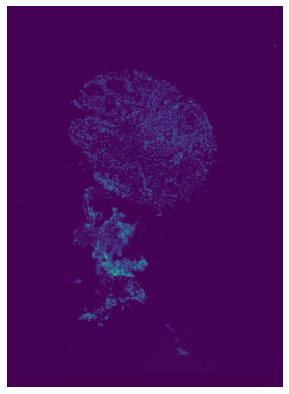

In [14]:
core0 = sitk.ReadImage(core_dir + '/unregistered_core=1_round=R0_color=c1.tif')
utils.myshow(core)

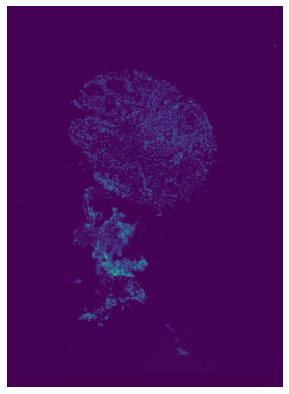

In [15]:
core1 = sitk.ReadImage(core_dir + '/registered_core=1_round=R1_color=c1.tif')
utils.myshow(core)

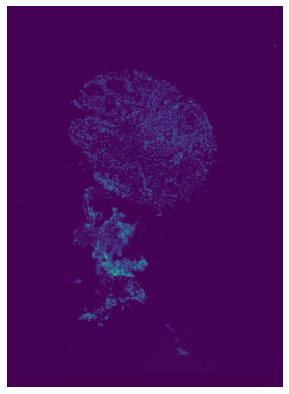

In [16]:
core2 = sitk.ReadImage(core_dir + '/registered_core=1_round=R2_color=c1.tif')
utils.myshow(core)

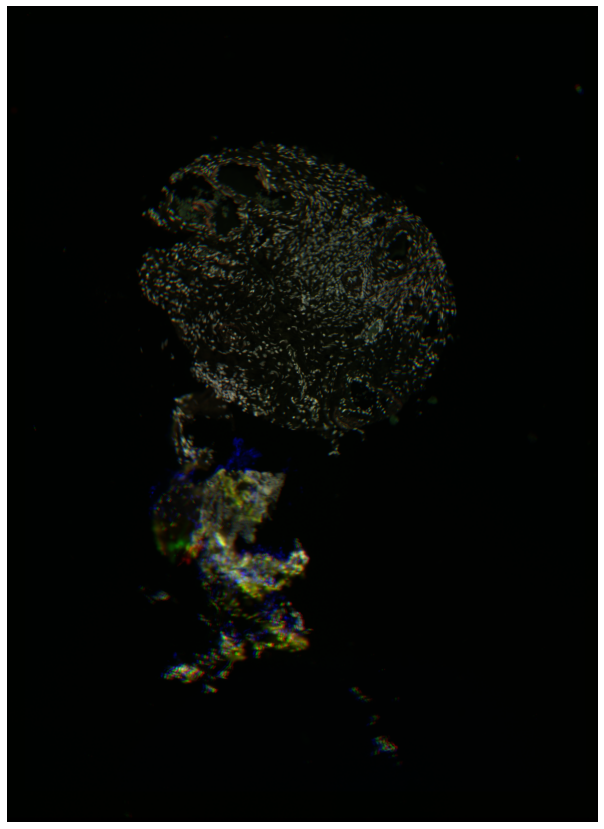

In [19]:
sigm1 = sitk.Cast(sitk.RescaleIntensity(core0), sitk.sitkUInt8)
sigm2 = sitk.Cast(sitk.RescaleIntensity(core1), sitk.sitkUInt8)
sigm3 = sitk.Cast(sitk.RescaleIntensity(core2), sitk.sitkUInt8)

cimg = sitk.Compose(sigm1, sigm2, sigm3)

utils.myshow(cimg, figsize=(15,15))

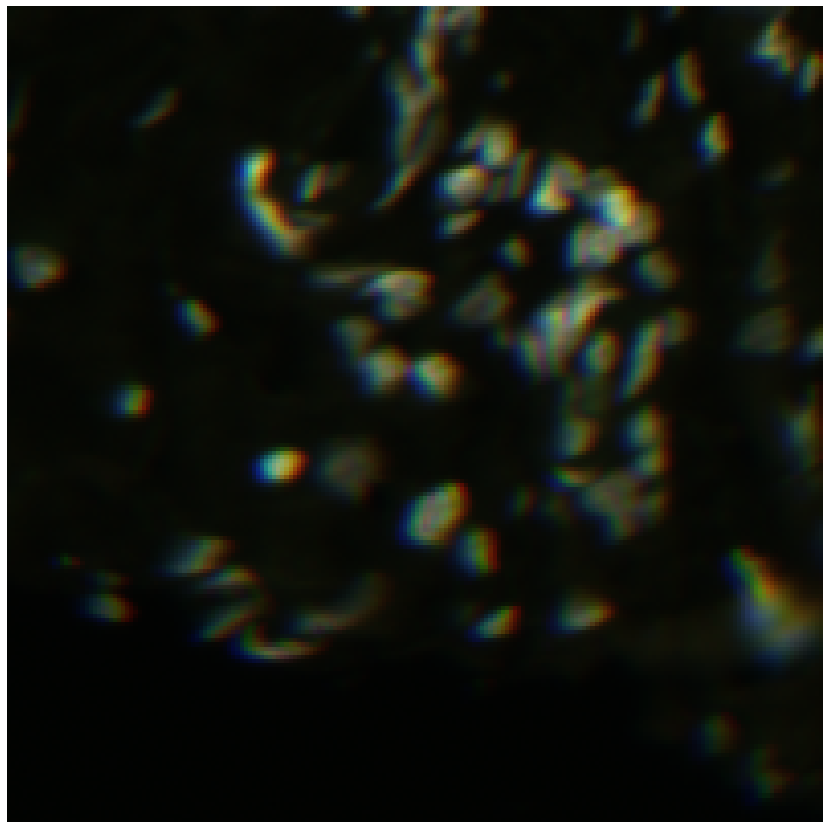

In [22]:
wsize = 100
x,y = cimg.GetSize()
utils.myshow(cimg[int(x/2-wsize):int(x/2+wsize), int(y/2-wsize):int(y/2+wsize)], figsize=(15,15))